In [34]:
#Imports
import yfinance as yf
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import datetime, timedelta
from random import randrange
from prophet import Prophet
from sklearn.metrics import mean_squared_error,r2_score
from prophet.diagnostics import cross_validation
import pandas as pd
import plotly.offline as py
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
datas=[]
stocks = ['FB','GOOG','AMZN','MSFT','AAPL','GS','JPM','BAC','WFC','CG']
labels = ['Facebook','Google','Amazon','Microsoft','Apple','Goldman Sachs',
          'JPMorgan','Bank of America',
          'Wells Fargo & Compagny','The Carlyle Group']
# Train model with daily data between `start` and `end`
start = (datetime.now() - timedelta(days=3*365+1)).strftime("%Y-%m-%d")
end = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
target = 'Adj Close'
plt.rcParams['figure.figsize'] = [12, 9]  # plot larger than default
# We will use the `n_prior` previous days to predict the nex `n_to_predict` days
#n_prior = 30
#n_to_predict = 7
# Proportion of validation and test data
#p_val = .1
#p_test = .2 

In [3]:
for stock in stocks:
    datas.append(yf.download(tickers=stock, period='1d', start=start, end=end))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
for i,data in enumerate(datas):
    datas[i]=data[[target]]

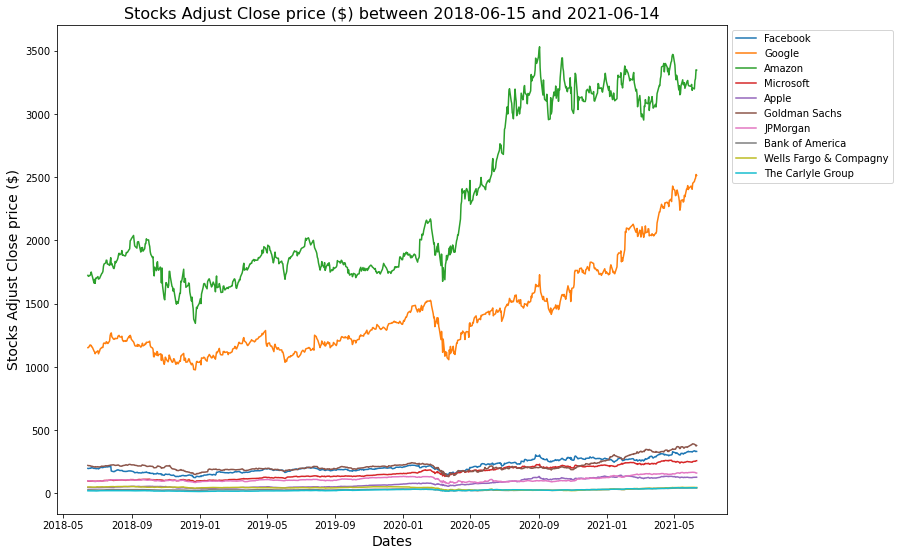

In [5]:
for i,data in enumerate(datas):
    plt.plot(data,label=labels[i])
plt.xlabel(f'Dates',size=14)
plt.ylabel(f'Stocks Adjust Close price ($)',size=14)
plt.title(f'Stocks Adjust Close price ($) between {start} and {end}',size=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show() 

In [6]:
for i in range(len(datas)):
    datas[i].reset_index(inplace=True)
    datas[i].rename(columns={"Date": "ds", "Adj Close": "y"},inplace=True)
   

In [7]:
datas

[            ds           y
 0   2018-06-14  196.809998
 1   2018-06-15  195.850006
 2   2018-06-18  198.309998
 3   2018-06-19  197.490005
 4   2018-06-20  202.000000
 ..         ...         ...
 749 2021-06-07  336.579987
 750 2021-06-08  333.679993
 751 2021-06-09  330.250000
 752 2021-06-10  332.459991
 753 2021-06-11  331.260010
 
 [754 rows x 2 columns],
             ds            y
 0   2018-06-14  1152.119995
 1   2018-06-15  1152.260010
 2   2018-06-18  1173.459961
 3   2018-06-19  1168.060059
 4   2018-06-20  1169.839966
 ..         ...          ...
 749 2021-06-07  2466.090088
 750 2021-06-08  2482.850098
 751 2021-06-09  2491.399902
 752 2021-06-10  2521.600098
 753 2021-06-11  2513.929932
 
 [754 rows x 2 columns],
             ds            y
 0   2018-06-14  1723.859985
 1   2018-06-15  1715.969971
 2   2018-06-18  1723.790039
 3   2018-06-19  1734.780029
 4   2018-06-20  1750.079956
 ..         ...          ...
 749 2021-06-07  3198.010010
 750 2021-06-08  3264.110107
 

# Baselines

In [8]:
datas_b=datas.copy()

In [9]:
datas


[            ds           y
 0   2018-06-14  196.809998
 1   2018-06-15  195.850006
 2   2018-06-18  198.309998
 3   2018-06-19  197.490005
 4   2018-06-20  202.000000
 ..         ...         ...
 749 2021-06-07  336.579987
 750 2021-06-08  333.679993
 751 2021-06-09  330.250000
 752 2021-06-10  332.459991
 753 2021-06-11  331.260010
 
 [754 rows x 2 columns],
             ds            y
 0   2018-06-14  1152.119995
 1   2018-06-15  1152.260010
 2   2018-06-18  1173.459961
 3   2018-06-19  1168.060059
 4   2018-06-20  1169.839966
 ..         ...          ...
 749 2021-06-07  2466.090088
 750 2021-06-08  2482.850098
 751 2021-06-09  2491.399902
 752 2021-06-10  2521.600098
 753 2021-06-11  2513.929932
 
 [754 rows x 2 columns],
             ds            y
 0   2018-06-14  1723.859985
 1   2018-06-15  1715.969971
 2   2018-06-18  1723.790039
 3   2018-06-19  1734.780029
 4   2018-06-20  1750.079956
 ..         ...          ...
 749 2021-06-07  3198.010010
 750 2021-06-08  3264.110107
 

In [10]:
for i in range(len(datas_b)):
    datas_b[i]['yhat']=datas_b[i]['y'].shift(1)
    datas_b[i].dropna(inplace=True)
    print("\n"+labels[i]+" Baseline: ")
    print("r2_score close :", r2_score(datas_b[i]['y'], datas_b[i]['yhat']))
    print('Adjust Close MSE: :',mean_squared_error(datas_b[i]['y'], datas_b[i]['yhat']))


Facebook Baseline: 
r2_score close : 0.9901468150195916
Adjust Close MSE: : 25.150316443620188

Google Baseline: 
r2_score close : 0.9945127314286901
Adjust Close MSE: : 725.2529055877214

Amazon Baseline: 
r2_score close : 0.9946766043518115
Adjust Close MSE: : 2253.944470890272

Microsoft Baseline: 
r2_score close : 0.9957077830311094
Adjust Close MSE: : 10.69149858857436

Apple Baseline: 
r2_score close : 0.9967926507320696
Adjust Close MSE: : 3.400144869601474

Goldman Sachs Baseline: 
r2_score close : 0.9922759482339752
Adjust Close MSE: : 20.16911230748272

JPMorgan Baseline: 
r2_score close : 0.9875163135688688
Adjust Close MSE: : 4.99238190767949

Bank of America Baseline: 
r2_score close : 0.9844969854214985
Adjust Close MSE: : 0.37467690251213503

Wells Fargo & Compagny Baseline: 
r2_score close : 0.9929022543846181
Adjust Close MSE: : 0.6844321535077366

The Carlyle Group Baseline: 
r2_score close : 0.9931189115550819
Adjust Close MSE: : 0.3434325848744944


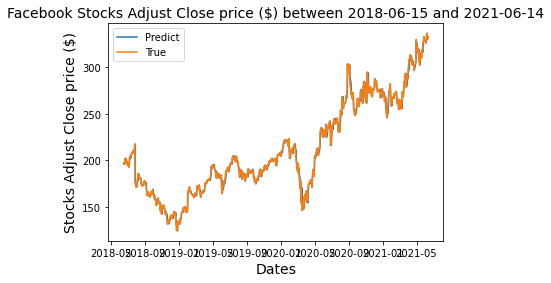

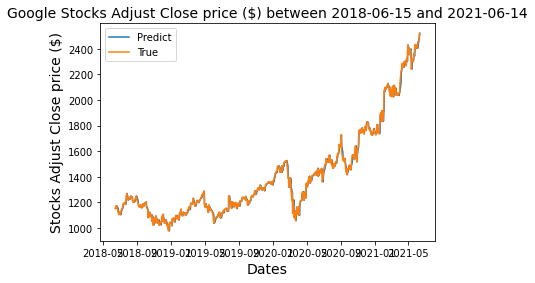

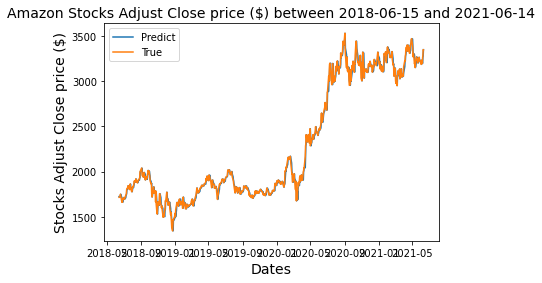

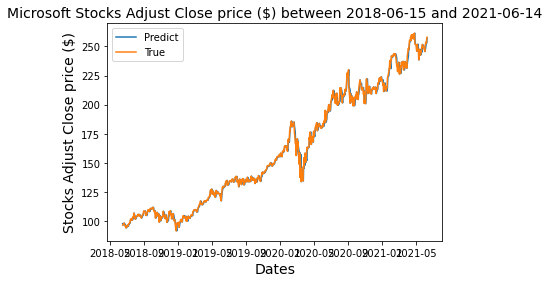

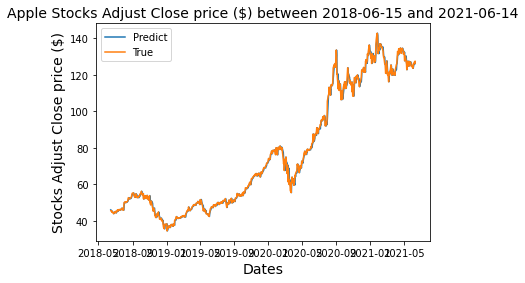

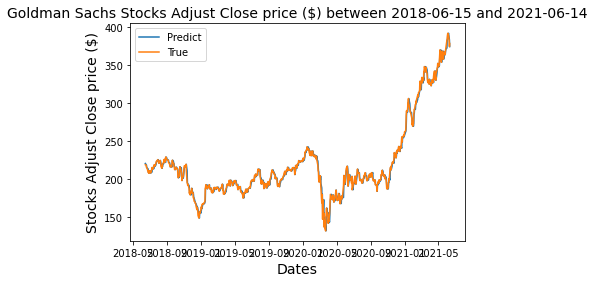

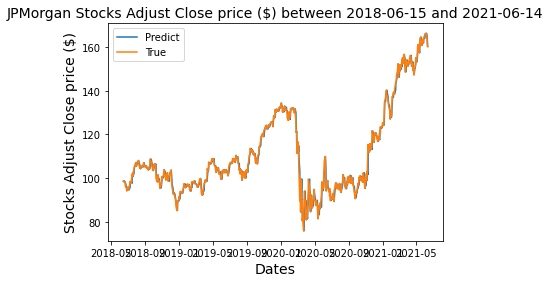

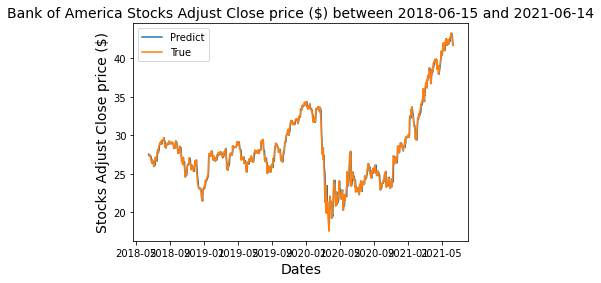

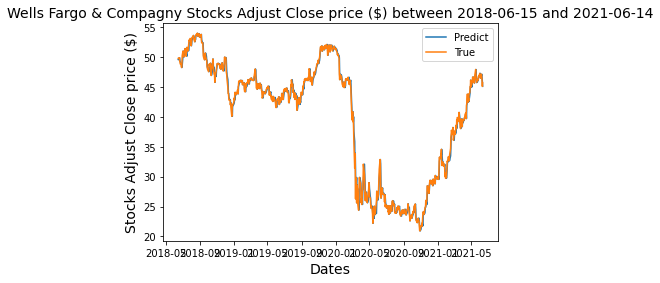

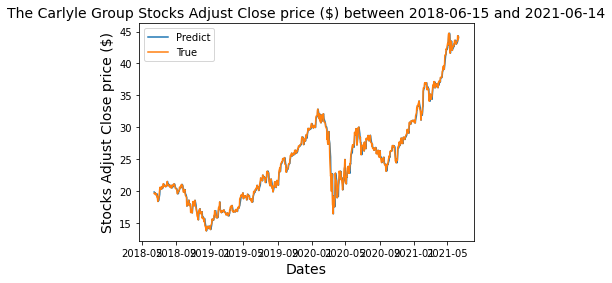

In [39]:
for i,data in enumerate(datas_b):
    plt.plot(data['ds'],data['yhat'],label="Predict")
    plt.plot(data['ds'],data['y'],label="True")
    plt.xlabel(f'Dates',size=14)
    plt.ylabel(f'Stocks Adjust Close price ($)',size=14)
    plt.title(labels[i]+f' Stocks Adjust Close price ($) between {start} and {end}',size=14)
   # plt.title(labels[i],size=18)
    plt.legend()
    plt.show()

# Model


## FB Prophet

In [44]:
#def plot_model():

for i in range(len(datas)):
    model= Prophet(yearly_seasonality=False,
            weekly_seasonality=False,
           daily_seasonality=False)
    model.fit(datas[i])
    future = model.make_future_dataframe(periods=10, freq='D')
    fcst = model.predict(future)
    fig = plot_plotly(model, fcst)
    fig.update_layout(title=labels[i]+f' Stocks Adjust Close price ($) Visual Prediction',xaxis_title="Dates",yaxis_title="Stocks Adjust Close price ($)")
    py.iplot(fig)
   # return plot

## Cross Validation


In [54]:
df_cv = cross_validation(model, initial='10 days', period='30 days', horizon = '1 days')

INFO:prophet:Making 36 forecasts with cutoffs between 2018-07-15 00:00:00 and 2021-06-10 00:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.


In [55]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-07-16,21.175750,20.779754,21.541253,20.471619,2018-07-15
1,2018-08-15,20.717790,20.377741,21.027735,20.487144,2018-08-14
2,2018-09-14,19.799434,19.412660,20.189361,20.574883,2018-09-13
3,2018-10-15,18.556994,17.923367,19.160951,18.205917,2018-10-14
4,2018-11-14,16.837926,16.118826,17.544286,16.785244,2018-11-13
5,2018-12-14,15.420996,14.737313,16.188579,14.574067,2018-12-13
6,2019-01-14,13.814650,12.954855,14.603055,15.469282,2019-01-13
7,2019-02-13,16.922757,16.121501,17.665229,16.847908,2019-02-12
8,2019-03-15,17.199344,16.374545,17.991482,17.419195,2019-03-14
9,2019-04-15,17.243366,16.519964,18.062788,17.300066,2019-04-14


In [56]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,5.207913,2.282085,1.39305,0.055322,0.024007,0.054838,0.666667
